In [17]:
import os
import numpy as np
import keras
import pandas as pd
import cv2
from keras.preprocessing import image
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

### Loading & Transforming our Training Data to a Numpy Array

In [3]:
X_train, y_train = [], []
for i in os.listdir('D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/dataset/training_set'):
    true_class = i
    for j in os.listdir('D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/dataset/training_set/' + i):
        img = image.load_img('D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/dataset/training_set/' + i + '/' + j, 
                                    target_size = (56, 56))
        img = image.img_to_array(img)
        X_train.append(img)
        y_train.append(i)

### Loading & Transforming our Test Data to a Numpy Array

In [4]:
X_test, y_test = [], []
for i in os.listdir('D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/dataset/test_set'):
    true_class = i
    for j in os.listdir('D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/dataset/test_set/' + i):
        img = image.load_img('D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/dataset/test_set/' + i + '/' + j, 
                                    target_size = (56, 56))
        img = image.img_to_array(img)
        X_test.append(img)
        y_test.append(i)

In [5]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6696, 56, 56, 3)
(6696,)
(800, 56, 56, 3)
(800,)


### Reshaping our Data to fit into the Fully Connected Layers

In [7]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2] * 3)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2] * 3)

### Normalizing our Data

In [8]:
X_train = X_train.astype('float32') 
X_test  = X_test.astype('float32')
X_train /= 255
X_test  /= 255

### One Hot Encoding Our Labels 

In [9]:
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [20]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Defining our ANN Model

In [14]:
model = Sequential()
model.add(Dense(3136, input_dim = 9408, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(8, activation = 'softmax'))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ["accuracy"])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 3136)              29506624  
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dense_8 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 1032      
Total params: 33,310,408
Trainable params: 33,310,408
Non-trainable params: 0
_________________________________________________________________


In [15]:
hist = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 15, batch_size = 16)

Train on 6696 samples, validate on 800 samples
Epoch 1/15
6696/6696 [==============================] - 150s 22ms/step - loss: 2.3932 - accuracy: 0.2445 - val_loss: 1.8023 - val_accuracy: 0.2862
Epoch 2/15
6696/6696 [==============================] - 149s 22ms/step - loss: 1.7726 - accuracy: 0.3218 - val_loss: 1.6626 - val_accuracy: 0.3462
Epoch 3/15
6696/6696 [==============================] - 148s 22ms/step - loss: 1.6909 - accuracy: 0.3610 - val_loss: 1.6129 - val_accuracy: 0.3950
Epoch 4/15
6696/6696 [==============================] - 150s 22ms/step - loss: 1.6427 - accuracy: 0.3832 - val_loss: 1.6334 - val_accuracy: 0.4013
Epoch 5/15
6696/6696 [==============================] - 148s 22ms/step - loss: 1.5957 - accuracy: 0.4101 - val_loss: 1.5570 - val_accuracy: 0.3975
Epoch 6/15
6696/6696 [==============================] - 148s 22ms/step - loss: 1.5256 - accuracy: 0.4337 - val_loss: 1.5595 - val_accuracy: 0.3875
Epoch 7/15
6696/6696 [==============================] - 148s 22ms/step 

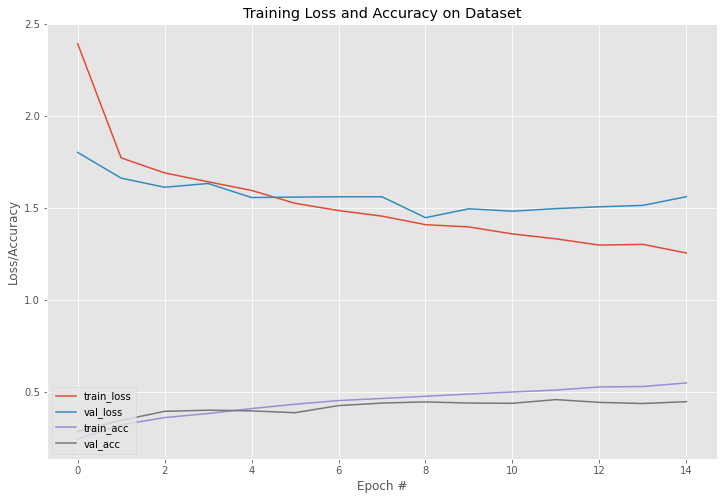

In [19]:
epochs = 15

plt.style.use("ggplot")
plt.figure(figsize = (12, 8))
plt.plot(np.arange(0, epochs), hist.history["loss"], label = "train_loss")
plt.plot(np.arange(0, epochs), hist.history["val_loss"], label = "val_loss")
plt.plot(np.arange(0, epochs), hist.history["accuracy"], label = "train_acc")
plt.plot(np.arange(0, epochs), hist.history["val_accuracy"], label = "val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc = "lower left")
plt.savefig('D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/plots/ann.png')